Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Disclaimer**: This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

# Overview

This notebook covers loading the Dandiset 000690 version 0.250326.0015 using the DANDI API, exploring its metadata, loading an NWB file, and visualizing LFP data.

## Dataset Description

The Allen Institute Openscope - Vision2Hippocampus project aims to understand how neural representations of simple and natural visual stimuli evolve through the mouse brain, from the lateral geniculate nucleus (LGN) and primary visual cortex (V1) to hippocampal regions. Mice were presented with:
- **Simple visual motion**: moving bars of light (varied width, speed, contrast, “disco” bar).
- **Complex movie stimuli**: natural scenes involving eagles and squirrels.

The dataset includes high-density extracellular electrophysiology recordings (LFP, spike sorting) obtained with Neuropixels probes across multiple brain regions.

Dandiset link: https://dandiarchive.org/dandiset/000690/0.250326.0015

# Required Packages

The following Python packages are required and should be pre-installed:

- itertools
- dandi.dandiapi
- pynwb
- h5py
- remfile
- numpy
- pandas
- matplotlib
- seaborn

# Loading the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


# Selecting an NWB File

We select one representative session and probe for demonstration:

- **File path**: `sub-692072/sub-692072_ses-1298465622_probe-1_ecephys.nwb`
- **Rationale**: Contains LFP recordings from 73 channels at 625 Hz, suitable for basic visualization.

Download URL:

https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/

# Loading the NWB File

In [2]:
import pynwb
import h5py
import remfile

# Remote NWB file URL
url = "https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/"

# Load NWB file with error handling
try:
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
except Exception as e:
    print("Error loading NWB file:", e)
    raise

# Print high-level information
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Identifier: {nwb.identifier}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: LFP data and associated info for one probe
Session start time: 2023-09-21 00:00:00-07:00
Identifier: 1


# NWB File Structure

This section shows top-level HDF5 groups and key NWBFile attributes.

In [3]:
# Explore HDF5 structure
print("HDF5 root groups:")
for key in h5_file.keys():
    print(f"- {key}")
print("\nNWB acquisition keys:", list(nwb.acquisition.keys()))
print("NWB processing modules:", list(nwb.processing.keys()))
print("NWB electrode groups:", list(nwb.electrode_groups.keys()))

HDF5 root groups:
- acquisition
- analysis
- file_create_date
- general
- identifier
- processing
- session_description
- session_start_time
- specifications
- stimulus
- timestamps_reference_time

NWB acquisition keys: ['probe_1_lfp', 'probe_1_lfp_data']
NWB processing modules: []
NWB electrode groups: ['probeB']


# Electrode Metadata

Display the first 10 electrode channels with location and 3D coordinates.

In [4]:
import pandas as pd
from IPython.display import display

elec_df = nwb.electrodes.to_dataframe()
elec_df.reset_index(inplace=True)
elec_df.rename(columns={'index': 'id'}, inplace=True)
elec_subset = elec_df[['id', 'x', 'y', 'z', 'location', 'group_name']].head(10)
display(elec_subset)

,id,x,y,z,location,group_name
0,1002,9393.0,3901.0,9310.0,SUB,probeB
1,1006,9400.0,3871.0,9309.0,SUB,probeB
2,1010,9406.0,3840.0,9308.0,SUB,probeB
3,1014,9415.0,3802.0,9307.0,SUB,probeB
4,1018,9421.0,3770.0,9306.0,SUB,probeB
5,1022,9428.0,3739.0,9305.0,SUB,probeB
6,1026,9435.0,3706.0,9304.0,SUB,probeB
7,1030,9441.0,3673.0,9303.0,SUB,probeB
8,1034,9448.0,3639.0,9302.0,SUB,probeB
9,1038,9456.0,3596.0,9300.0,SUB,probeB


# Units Table

Check for and display spike unit metadata if available.

In [5]:
units_table = getattr(nwb, 'units', None)
if units_table is not None:
    units_df = units_table.to_dataframe()
    print(f"Units table with {len(units_df)} entries")
    display(units_df.head())
else:
    print("No units table found in this NWB file.")

No units table found in this NWB file.


# Neurosift Link

Explore this NWB file interactively in Neurosift:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/&dandisetId=000690&dandisetVersion=0.250326.0015

# Visualizing LFP Data

Local Field Potentials (LFP) reflect aggregate synaptic activity. Below we plot raw waveforms and a spectrogram for channel 0 as examples.

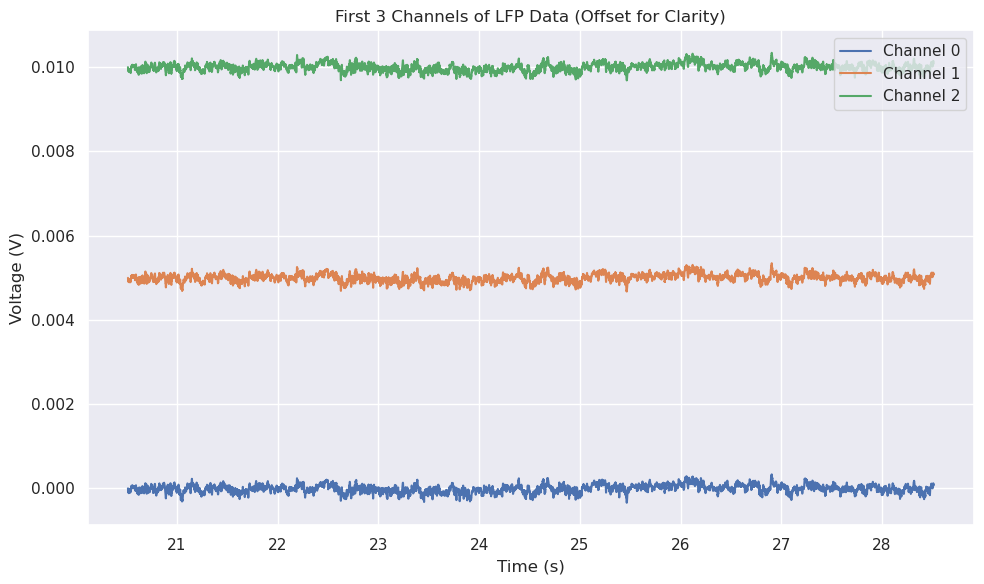

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Access the LFP ElectricalSeries
lfp_series = nwb.acquisition['probe_1_lfp'].electrical_series['probe_1_lfp_data']

# Load a small subset: first 10000 samples for the first 3 channels
num_samples = 10000
num_channels = 3
timestamps = lfp_series.timestamps[:num_samples]
data = lfp_series.data[:num_samples, :num_channels]

# Plot the first 3 channels with offset
plt.figure(figsize=(10, 6))
for ch in range(num_channels):
    plt.plot(timestamps, data[:, ch] + ch * 0.005, label=f"Channel {ch}")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("First 3 Channels of LFP Data (Offset for Clarity)")
plt.legend()
plt.tight_layout()

## LFP Spectrogram

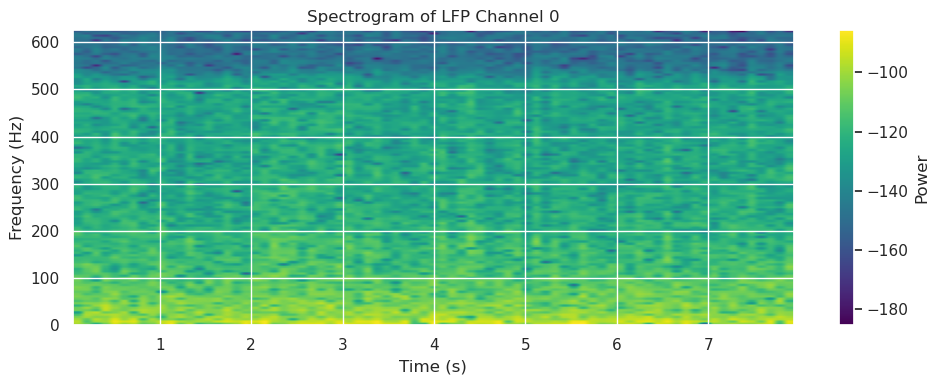

In [7]:
# Compute sampling rate
dt = np.median(np.diff(timestamps))
fs = 1.0 / dt

plt.figure(figsize=(10, 4))
plt.specgram(data[:, 0], NFFT=256, Fs=fs, noverlap=128, cmap='viridis')
plt.colorbar(label='Power')
plt.title("Spectrogram of LFP Channel 0")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()

# Summary and Future Directions

This notebook demonstrated how to:

- Connect to the DANDI archive and load metadata  
- List and select assets in a Dandiset  
- Load an NWB file remotely using PyNWB with error handling  
- Explore the NWB file structure and electrode metadata  
- Visualize raw LFP waveforms and a spectrogram

Future directions include:

- Exploring other probe recordings (e.g., probes 0, 2, 3)  
- Analyzing spike unit data  
- Examining imaging NWB files  
- Implementing advanced analyses such as event-related LFP averages or connectivity metrics